# **VEHICLE DETECTION USING YOLO11**

## *Installing necessary libraries*

In [ ]:
!pip install ultralytics
!pip install roboflow


In [ ]:
!apt update
!apt install ffmpeg libsm6 libxext6 -y

In [ ]:
!pwd

/content


**LOAD DATA FROM ROBOFLOW**

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="...")
project = rf.workspace("...").project("...")#Save your dataset into workspace from the dataset into Roboflow
version = project.version(3)
dataset = version.download("yolov11", location="/content/custom_dataset")

In [ ]:
!nvcc --version

In [ ]:
import torch
print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)

Torch version: 2.6.0+cu124
CUDA available: True
CUDA version: 12.4


# **TRAIN THE YOLOV11 MODEL ON CUSTOM DATASET**

In [ ]:
!ls custom_dataset/train/images

In [ ]:
!cat custom_dataset/custom_data.yaml

In [ ]:
yaml_path = "custom_dataset/custom_data.yaml"

with open(yaml_path, "r") as f:
    lines = f.readlines()

with open(yaml_path, "w") as f:
    for line in lines:
        if line.strip().startswith("train:"):
            f.write("train: /content/custom_dataset/train/images\n")
        elif line.strip().startswith("val:"):
            f.write("val: /content/custom_dataset/valid/images\n")
        elif line.strip().startswith("test:"):
            f.write("test: /content/custom_dataset/test/images\n")
        else:
            f.write(line)


In [ ]:
!cat custom_dataset/custom_data.yaml

In [ ]:
!yolo task=detect mode=train model=yolo11n.pt data="custom_dataset/custom_data.yaml" epochs=20 imgsz=640

# RUN INFERENCE ON IMAGES :

In [ ]:
from ultralytics import YOLO
import cv2
import os
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt


image 1/1 /content/images/bus.jpg: 640x640 1 Bus, 11.6ms
Speed: 4.1ms preprocess, 11.6ms inference, 140.8ms postprocess per image at shape (1, 3, 640, 640)


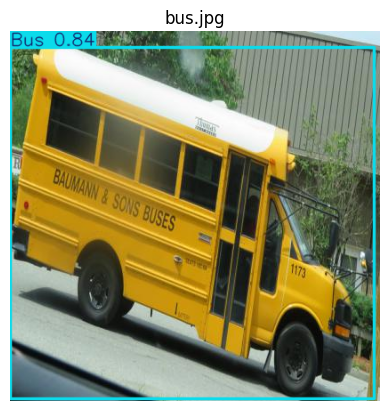


image 1/1 /content/images/truck.jpg: 448x640 1 Truck, 55.0ms
Speed: 3.6ms preprocess, 55.0ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


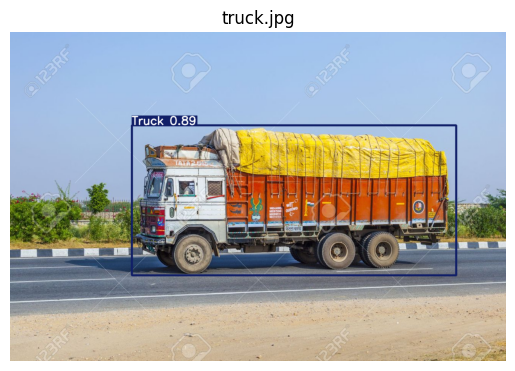


image 1/1 /content/images/car.jpeg: 384x640 1 Car, 53.8ms
Speed: 2.3ms preprocess, 53.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


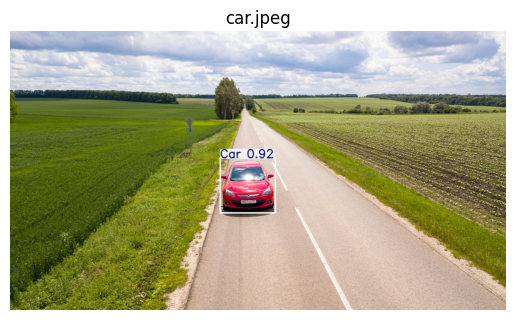


image 1/1 /content/images/ambulance.jpeg: 448x640 1 Ambulance, 14.4ms
Speed: 2.8ms preprocess, 14.4ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)


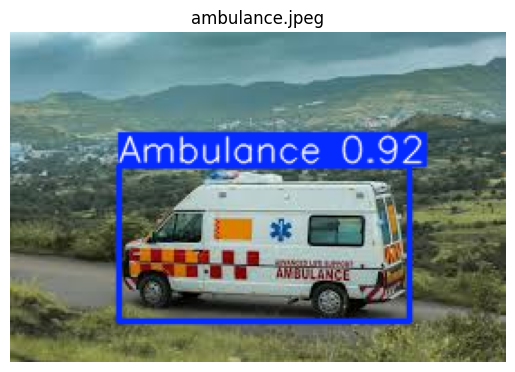

In [ ]:
# Load the model
model = YOLO("...")  # Adjust path as per location of model weights

# Path to uploaded images
image_folder = "/content/images"  # Update if your folder is different

# Get all image files
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Run inference and display results
for image_name in image_files:
    image_path = os.path.join(image_folder, image_name)

    # Run YOLO inference
    results = model(image_path)

    # Annotated result
    annotated_frame = results[0].plot()

    # Convert BGR to RGB for display
    annotated_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

    # Show image
    plt.imshow(annotated_rgb)
    plt.title(image_name)
    plt.axis('off')
    plt.show()